 
Final Policy Prior:
[0.02214869 0.91136123 0.02219271 0.02214869 0.02214869]
 
Final Policy Posterior:
[5.43818445e-09 9.76227697e-01 2.37722873e-02 5.34117285e-09
 5.34117285e-09]
 
Final Policy Difference Vector:
[-0.02214868  0.06486647  0.00157957 -0.02214868 -0.02214868]
 
Negative Expected Free Energy:
[-12.505   -9.51   -12.5034 -12.505  -12.505 ]
 
Prior G Precision (Prior Gamma):
1
 
Posterior G Precision (Gamma):
1.2411222533214152
 


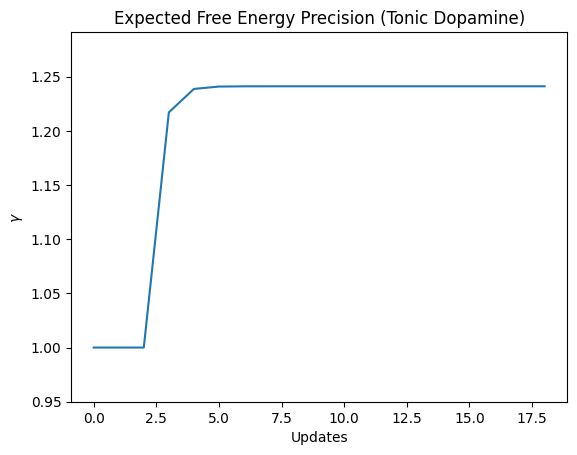

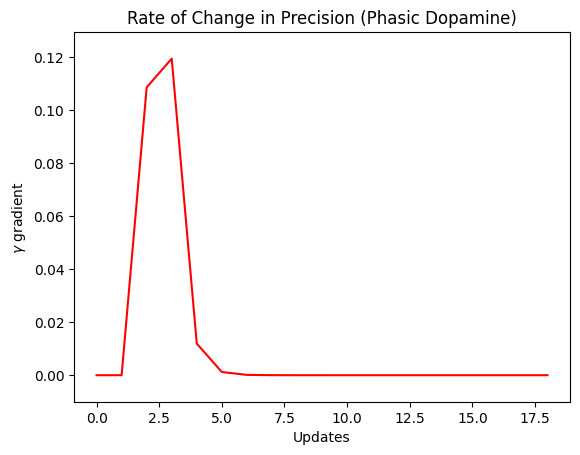

In [3]:
# Example code for simulated expected free energy precision (beta/gamma) updates
# (associated with dopamine in the neural process theory)

# Supplementary Code for: A Step-by-Step Tutorial on Active Inference Modelling and its 
# Application to Empirical Data

# By: Ryan Smith, Karl J. Friston, Christopher J. Whyte
###############################################################################

# 参考《主动推理》“精度”：P205 知识库7.1

import numpy as np
import matplotlib.pyplot as plt

# This script will reproduce the simulation results in Figure 9

# Here you can set the number of policies and the distributions that
# contribute to prior and posterior policy precision

E = np.array([1, 1, 1, 1, 1])  # Set a fixed-form prior distribution over policies (habits)

G = np.array([12.505, 9.51, 12.5034, 12.505, 12.505])  # Set an example expected 
                                                       # free energy distribution over policies

F = np.array([17.0207, 1.7321, 1.7321, 17.0387, 17.0387])  # Set an example variational 
                                                           # free energy distribution over 
                                                           # policies after a new observation

gamma_0 = 1  # Starting expected free energy precision value
gamma = gamma_0  # Initial expected free energy precision to be updated
beta_prior = 1 / gamma  # Initial prior on expected free energy precision
beta_posterior = beta_prior  # Initial posterior on expected free energy precision
psi = 2  # Step size parameter (promotes stable convergence)

gamma_dopamine = []
policies_neural = []

for ni in range(16):  # number of variational updates (16)

    # calculate prior and posterior over policies (see main text for 
    # explanation of equations) 

    pi_0 = np.exp(np.log(E) - gamma * G) / np.sum(np.exp(np.log(E) - gamma * G))  # prior over policies

    pi_posterior = np.exp(np.log(E) - gamma * G - F) / np.sum(np.exp(np.log(E) - gamma * G - F))  # posterior 
                                                                                                 # over policies
    # calculate expected free energy precision 

    G_error = np.dot((pi_posterior - pi_0), -G)  # expected free energy prediction error

    beta_update = beta_posterior - beta_prior + G_error  # change in beta:  
                                                         # gradient of F with respect to gamma 
                                                         # (recall gamma = 1/beta)
    
    beta_posterior = beta_posterior - beta_update / psi  # update posterior precision 
                                                         # estimate (with step size of psi = 2, which reduces 
                                                         # the magnitude of each update and can promote 
                                                         # stable convergence)

    gamma = 1 / beta_posterior  # update expected free energy precision

    # simulate dopamine responses

    gamma_dopamine.append(gamma)  # simulated neural encoding of precision
                                  # (beta_posterior^-1) at each iteration of 
                                  # variational updating                                 

    policies_neural.append(pi_posterior)  # neural encoding of posterior over policies at 
                                          # each iteration of variational updating

# Show Results

print(' ')
print('Final Policy Prior:')
print(pi_0)
print(' ')
print('Final Policy Posterior:')
print(pi_posterior)
print(' ')
print('Final Policy Difference Vector:')
print(pi_posterior - pi_0)
print(' ')
print('Negative Expected Free Energy:')
print(-G)
print(' ')
print('Prior G Precision (Prior Gamma):')
print(gamma_0)
print(' ')
print('Posterior G Precision (Gamma):')
print(gamma)
print(' ')

gamma_dopamine_plot = [gamma_0, gamma_0, gamma_0] + gamma_dopamine  # Include prior value

plt.figure()
plt.plot(gamma_dopamine_plot)
plt.ylim([min(gamma_dopamine_plot) - .05, max(gamma_dopamine_plot) + .05])
plt.title('Expected Free Energy Precision (Tonic Dopamine)')
plt.xlabel('Updates')
plt.ylabel(r'$\gamma$')
plt.show()

plt.figure()
plt.plot(np.gradient(gamma_dopamine_plot), 'r')
plt.ylim([min(np.gradient(gamma_dopamine_plot)) - .01, max(np.gradient(gamma_dopamine_plot)) + .01])
plt.title('Rate of Change in Precision (Phasic Dopamine)')
plt.xlabel('Updates')
plt.ylabel(r'$\gamma$ gradient')
plt.show()

# uncomment if you want to display/plot firing rates encoding beliefs about each
# policy (columns = policies, rows = updates over time)

# plt.plot(policies_neural)
# print('Firing rates encoding beliefs over policies:')
# print(np.array(policies_neural).T)
# print(' ')

原始m代码执行结果如下：

```
>> EFE_Precision_Updating
Final Policy Prior:
    0.0221
    0.9114
    0.0222
    0.0221
    0.0221

Final Policy Posterior:
    0.0000
    0.9762
    0.0238
    0.0000
    0.0000

Final Policy Difference Vector:
   -0.0221
    0.0649
    0.0016
   -0.0221
   -0.0221

Negative Expected Free Energy:
  -12.5050
   -9.5100
  -12.5034
  -12.5050
  -12.5050

Prior G Precision (Prior Gamma):
     1

Posterior G Precision (Gamma):
    1.2411

>> -12.5050

Prior G Precision (Prior Gamma):
     1
```

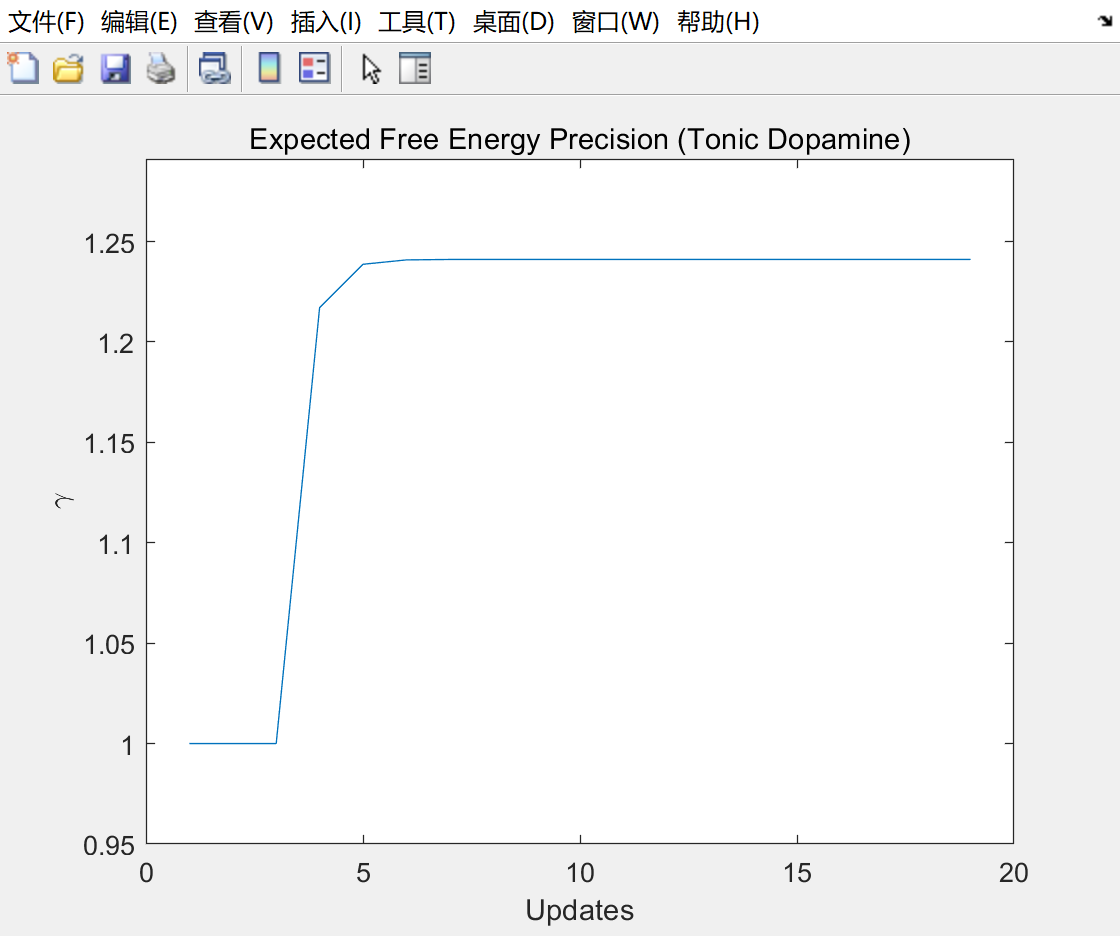
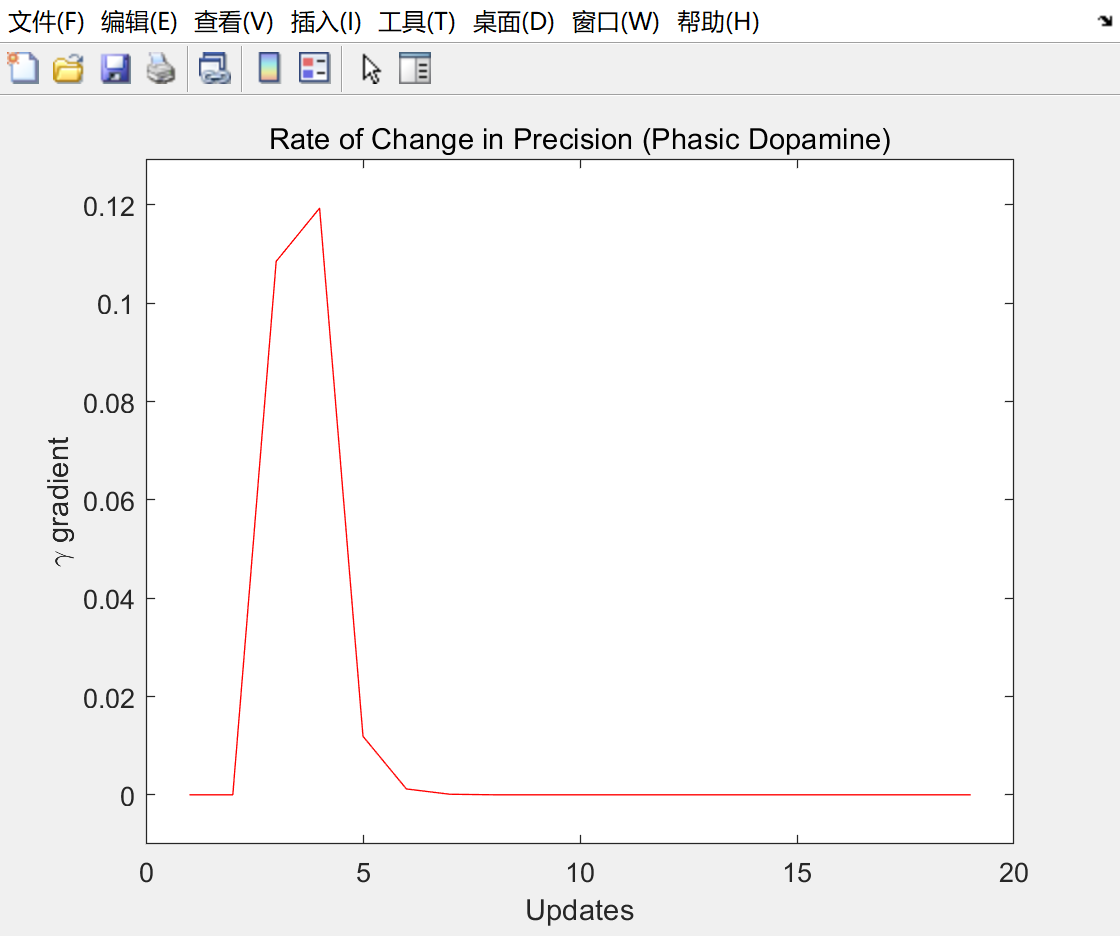